In [1]:
!pip install emnist

In [2]:
#Install EMIST library, import datasets of letters, Matplotlib
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
  from emnist import list_datasets
  list_datasets()
  #['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [4]:
from emnist import extract_training_samples
train_images, train_labels = extract_training_samples('letters')
print(train_images.shape)
print(train_labels.shape)

(124800, 28, 28)
(124800,)


In [5]:
from emnist import extract_test_samples
test_images, test_labels = extract_test_samples('letters')
print(test_images.shape)
print(test_labels.shape)

(20800, 28, 28)
(20800,)


In [6]:
train_data = pd.DataFrame(train_images.reshape(124800,784))
train_labels = pd.DataFrame(train_labels.reshape(124800))
test_data = pd.DataFrame(test_images.reshape(20800,784))

In [7]:
print(train_data.shape)
print(test_data.shape)

(124800, 784)
(20800, 784)


/Users/andyshin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

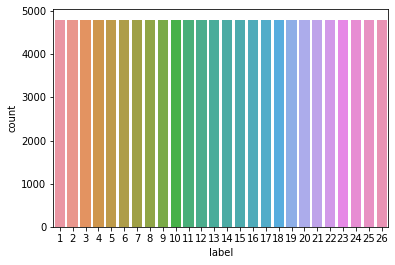

In [8]:
train_data = train_labels.join(train_data,how='left',lsuffix="left",rsuffix="")
train_data = train_data.rename(columns={'0left':'label'})
sns.countplot(train_data["label"])

/Users/andyshin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1     4800
2     4800
25    4800
24    4800
23    4800
22    4800
21    4800
20    4800
19    4800
18    4800
17    4800
16    4800
15    4800
14    4800
13    4800
12    4800
11    4800
10    4800
9     4800
8     4800
7     4800
6     4800
5     4800
4     4800
3     4800
26    4800
Name: label, dtype: int64

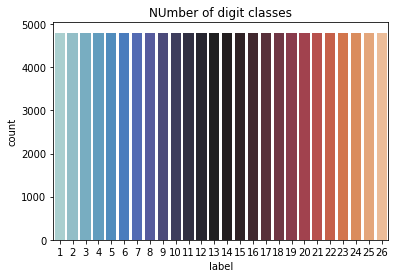

In [9]:
## Visualizing the number of class and counts in the datasets
plt.plot(figure = (16,10))
g = sns.countplot( train_data["label"], palette = 'icefire')
plt.title('NUmber of digit classes')
train_data.label.astype('category').value_counts()

Text(0.5, 1.0, 'Digit 4')

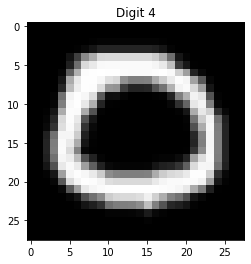

In [10]:
four = train_data.iloc[3, 1:]
four.shape
four = four.values.reshape(28,28)
plt.imshow(four, cmap='gray')
plt.title("Digit 4")

In [11]:
round(train_data.drop('label', axis=1).mean(), 2)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
779    0.0
780    0.0
781    0.0
782    0.0
783    0.0
Length: 784, dtype: float64

In [12]:
y = train_data['label']

## Dropping the variable 'label' from X variable 
X = train_data.drop(columns = 'label')

## Printing the size of data 
print(train_data.shape)

(124800, 785)


In [13]:
## Normalization

X = X/255.0
test_data = test_data/255.0

print("X:", X.shape)
print("test_data:", test_data.shape)

X: (124800, 784)
test_data: (20800, 784)


In [14]:
# confusion matrix and accuracy
# scaling the features
from sklearn.preprocessing import scale
X_scaled = scale(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, train_size = 0.2 ,random_state = 10)


In [15]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)



In [16]:
# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import confusion_matrix
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.7104166666666667 

[[ 948   16   22   42   43   13   48   52    1    1   22    6   33   42
    22   12   46   11    2    3   27    4   20    9    7   13]
 [  20 1146    4   62   12    2   49   46    7   14    9    9    9    5
    16    7    5    1    5    4    4    2    6    6    4   15]
 [  18    2 1199    6   75    8   25    2    4    4    2   12    0    3
    19    4   16    7    6    5    8    1    0    1    0    7]
 [  33  135    9  909    2    3   13   43   13   43    8   26    1    9
    77   22    7    0    5    4   16    5   10    3    2   10]
 [  50   21  171    3 1041    8   30    3    1    1   19    2    1    2
    10    5   13   35    2   11    6    7    6    6    0   14]
 [  11    1    8    5   10 1110   23   14   19   15    5    2    2    2
     0   95   21   36    9   52    0    2    1    3    6    7]
 [  74   51   26   14   10   20  784   10    5   47    9    2   11    2
    11   14  225    5   38   14    9    2    8    6   17   15]
 [  40   60    1   21   

In [17]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [18]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.8386485042735042 

[[1168    4    4   19   21    2   23   27    0    0   12    2   13   19
    22   11   54    5    2    3   10    1   36    1    2    4]
 [  20 1272    0   28    5    2   18   22    3    5    2   13    5    6
     9    7    8    1    0    1    2    0   32    1    1    6]
 [  18    4 1272    4   39    7    7    4    3    2    3    7    0    0
    13    5   13   10    2    2    1    0   17    1    0    0]
 [  19   46    1 1148    0    2    5    3    2   16    8   16    0    2
    71    7    7    0    1    2    8    1   37    2    2    2]
 [  23   13   71    3 1274    9    3    1    0    0    6    1    2    1
     8    1   10   13    2    8    1    0    6    2    0   10]
 [   8    3    2    3    2 1229    4    4    7    4    4    8    0    1
     0   66   10   28    5   35    0    0   28    2    4    2]
 [  39   37   11    7    5    9  956    3    4   16    2    0    2    2
     3    7  250    7   15    9    4    1   30    2    2    6]
 [  22   10    0   15   